In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gzip
import json
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df2 = getDF('/content/drive/MyDrive/reviews_Musical_Instruments_5.json.gz')
df2

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
list_of_reviewer_id = list(df2['reviewerID'])
list_of_rating = list(df2['overall'])
list_of_product_id = list(df2['asin'])
list_of_reviewTime = list(df2['reviewTime'])

In [5]:
new_list_of_review_year = []
for x in list_of_reviewTime:
  list1 = x.split()
  new_list_of_review_year.append(list1[-1])
print(len(new_list_of_review_year))

10261


In [6]:
def merge(list1, list2):
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list
tuple_t2 = merge(list_of_reviewer_id, new_list_of_review_year)
tuple_t3 = merge(list_of_product_id,new_list_of_review_year)
tuple_t4 = merge(list_of_rating,new_list_of_review_year)
list_of_tuple = list(tuple_t2)
list_of_tuple1 = list(tuple_t3)
list_of_tuple2 = list(tuple_t4)
sorted_list = sorted(list_of_tuple,key=lambda t: t[1])
sorted_list1 = sorted(list_of_tuple1,key=lambda t: t[1])
sorted_list2 = sorted(list_of_tuple2,key=lambda t: t[1])

In [7]:
print(len(sorted_list))

10261


In [8]:
print(len(sorted_list1))

10261


In [9]:
print(len(sorted_list2))

10261


In [10]:
list_of_reviewer_id_group1 = []
list_of_reviewer_id_group2 = []
list_of_rating_group1 = []
list_of_rating_group2 = []
list_of_product_id_group1 = []
list_of_product_id_group2 = []

In [11]:
for x in sorted_list:
  if int(x[1]) >=2004 and int(x[1]) <=2012:
     list_of_reviewer_id_group1.append(x[0])
  elif int(x[1]) >2012:
    list_of_reviewer_id_group2.append(x[0])

In [12]:
for x in sorted_list1:
  if int(x[1]) >=2004 and int(x[1]) <=2012:
    list_of_product_id_group1.append(x[0])
  elif int(x[1]) >2012:
    list_of_product_id_group2.append(x[0])

In [13]:
for x in sorted_list2:
  if int(x[1]) >=2004 and int(x[1]) <=2012:
    list_of_rating_group1.append(x[0])
  elif int(x[1]) >2012:
    list_of_rating_group2.append(x[0])

In [14]:
print(len(list_of_reviewer_id_group1))
print(len(list_of_product_id_group1))
print(len(list_of_rating_group1))

print(len(list_of_reviewer_id_group2))
print(len(list_of_product_id_group2))
print(len(list_of_rating_group2))

3527
3527
3527
6734
6734
6734


In [15]:
# graph of group 1 for p-p with edges = same rating
tuple_new_group1 = merge(list_of_product_id_group1,list_of_rating_group1)
new_list_of_tuple_group1= list(tuple_new_group1)
new_list_of_tuple_group1 = merge(list_of_reviewer_id_group1,tuple_new_group1)
print(len(new_list_of_tuple_group1))

3527


In [16]:
# graph of group 1 r-r with edges product and rating 4 and 5
graph_pos1 = nx.Graph()

12063
True


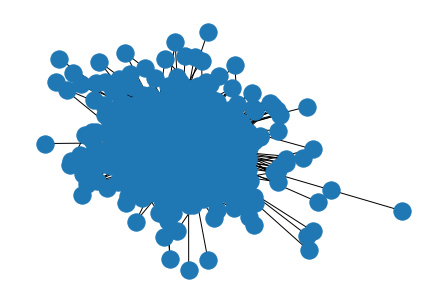

In [17]:
for x in new_list_of_tuple_group1:
  for y in new_list_of_tuple_group1:
    if ((int(x[1][1])==4 or int(x[1][1])==5) and (int(y[1][1])==4 or int(y[1][1])==5 ) and (str(x[1][0])==str(y[1][0])) and (str(x[0])!=str(y[0]))):
      graph_pos1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_pos1))
print(nx.is_connected(graph_pos1))
nx.draw(graph_pos1)

In [18]:
# graph of group 1 r-r with edges  rating 1 and 2 and 3
graph_neg1 = nx.Graph()

186043
True


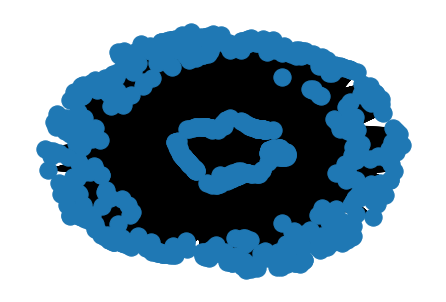

In [19]:
for x in new_list_of_tuple_group1:
  for y in new_list_of_tuple_group1:
    if ((int(x[1][1])==1 or int(x[1][1])==2 or int(x[1][1])==3 ) or (int(y[1][1])==1 or int(y[1][1])==2 or int(y[1][1])==3) and (str(x[0])!=str(y[0]))):
      graph_neg1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_neg1))
print(nx.is_connected(graph_neg1))
nx.draw(graph_neg1)

In [20]:
# graph of group 1 for r-r with edges =product id
tuple_new_21 = merge(list_of_reviewer_id_group1,list_of_product_id_group1)
new_list_of_tuple21 = list(tuple_new_21)
print(len(new_list_of_tuple21))

3527


In [21]:
# graph of group 1 r-r with edges  product id
graph_product1 = nx.Graph()

14770
True


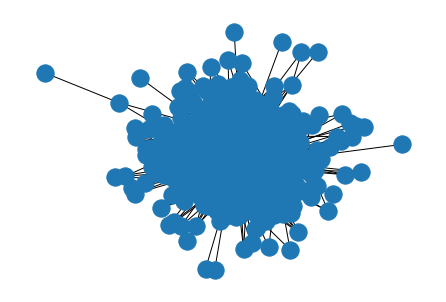

In [22]:
for x in new_list_of_tuple21:
  for y in new_list_of_tuple21:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_product1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_product1))
print(nx.is_connected(graph_product1))
nx.draw(graph_product1)

In [23]:
# graph of group 1 p-p with edges  rating
tuple_new_31 = merge(list_of_product_id_group1,list_of_reviewer_id_group1)
new_list_of_tuple31 = list(tuple_new_31)
print(len(new_list_of_tuple31))

3527


In [24]:
# graph of group 1 r-r with edges  product id
graph_porduct_pop1 = nx.Graph()

8920
False


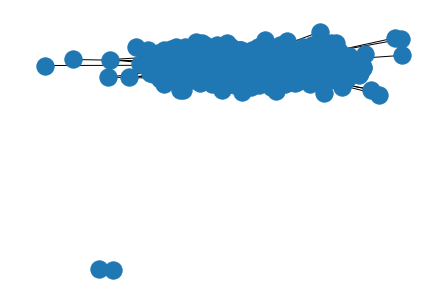

In [25]:
for x in new_list_of_tuple31:
  for y in new_list_of_tuple31:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_porduct_pop1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_porduct_pop1))
print(nx.is_connected(graph_porduct_pop1))
nx.draw(graph_porduct_pop1)

In [26]:
# graph of group 2 for p-p with edges = same rating
tuple_new_12 = merge(list_of_product_id_group2,list_of_rating_group2)
new_list_of_tuple12 = list(tuple_new_12)
new_list_of_tuple12 = merge(list_of_reviewer_id_group2,tuple_new_12)
print(len(new_list_of_tuple12))

6734


In [27]:
# graph of group 2 r-r with edges product and rating 4 and 5
graph_pos2 = nx.Graph()

43239
True


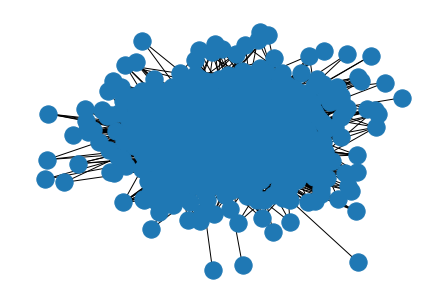

In [28]:
for x in new_list_of_tuple12:
  for y in new_list_of_tuple12:
    if ((int(x[1][1])==4 or int(x[1][1])==5) and (int(y[1][1])==4 or int(y[1][1])==5 ) and (str(x[1][0])==str(y[1][0])) and (str(x[0])!=str(y[0]))):
      graph_pos2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_pos2))
print(nx.is_connected(graph_pos2))
nx.draw(graph_pos2)

In [29]:
# graph of group 2 r-r with edges  rating 1 and 2 and 3
graph_neg2 = nx.Graph()

307969
True


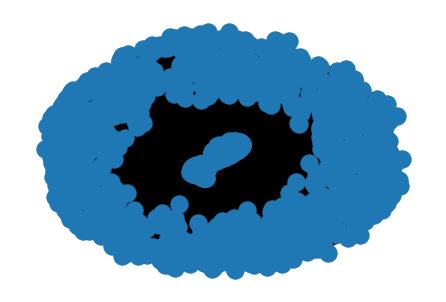

In [30]:
for x in new_list_of_tuple12:
  for y in new_list_of_tuple12:
    if ((int(x[1][1])==1 or int(x[1][1])==2 or int(x[1][1])==3) or (int(y[1][1])==1 or int(y[1][1])==2 or int(y[1][1])==3) or ((str(x[1][0])==str(y[1][0]))) and (str(x[0])!=str(y[0]))):
      graph_neg2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_neg2))
print(nx.is_connected(graph_neg2))
nx.draw(graph_neg2)

In [31]:
# graph of group 2 for r-r with edges =product id
tuple_new_23 = merge(list_of_reviewer_id_group2,list_of_product_id_group2)
new_list_of_tuple23 = list(tuple_new_23)
print(len(new_list_of_tuple23))

6734


In [32]:
# graph of group 2 r-r with edges  product id
graph_product2 = nx.Graph()

53379
True


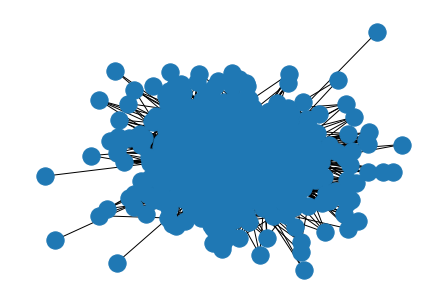

In [33]:
for x in new_list_of_tuple23:
  for y in new_list_of_tuple23:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_product2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_product2))
print(nx.is_connected(graph_product2))
nx.draw(graph_product2)

In [34]:
# graph of group 2 p-p with edges  rating
tuple_new_23 = merge(list_of_product_id_group2,list_of_reviewer_id_group2)
new_list_of_tuple23 = list(tuple_new_23)
print(len(new_list_of_tuple23))

6734


In [35]:
# graph of group 2 r-r with edges  product id
graph_porduct_pop2 = nx.Graph()

19543
True


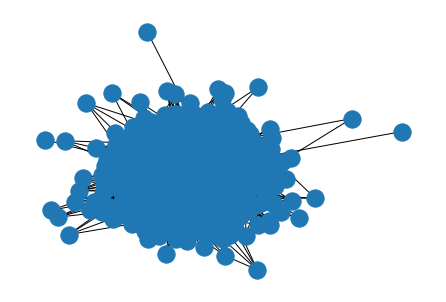

In [36]:
for x in new_list_of_tuple23:
  for y in new_list_of_tuple23:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_porduct_pop2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_porduct_pop2))
print(nx.is_connected(graph_porduct_pop2))
nx.draw(graph_porduct_pop2)

In [37]:
# community detection and community coloring 

In [38]:
from community import community_louvain
import numpy as np
import operator

In [39]:
def comm_color(graph_name,comms):
  cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'blue',
    7 : 'red',
    8 : 'purple',
    9 : 'grey',
    10: 'white',
    11: 'olive',
    12: 'navy blue',
    13: 'pink',
    14: 'coral',
    15: 'indego',
    16: 'amber',
    17: 'peach',
    18: 'maroon',
    19: 'pea green'

}
  node_cmap = [cmap[v] for _,v in comms.items()]
  pos = nx.spring_layout(graph_name)
  plt.figure(figsize=(15,10))
  plt.show(nx.draw(graph_name, pos, node_size = 70, alpha=0.8, node_color=node_cmap))

In [40]:
def comm_part(graph_name):
  comms = community_louvain.best_partition(graph_name)
  unique_coms = np.unique(list(comms.values()))
  return comms

In [41]:
def size_of_comm(comm):
  sorted_comm = sorted(comm.items(), key=operator.itemgetter(1))
  size_list_comm=[]
  c=0
  key = sorted_comm[0][1]
  for i in sorted_comm:
   if i[1] == key:
     c = c+1
   else :
     key = i[1]
     size_list_comm.append(c)
     c=0
  return size_list_comm

In [42]:
def avg_size_comm(size_list):
  sum=0
  for i in size_list:
    sum=sum+i
  return int(sum/(len(size_list)))



In [70]:
avg_size_list = []

[68, 60, 157, 52, 80, 146, 146]
101


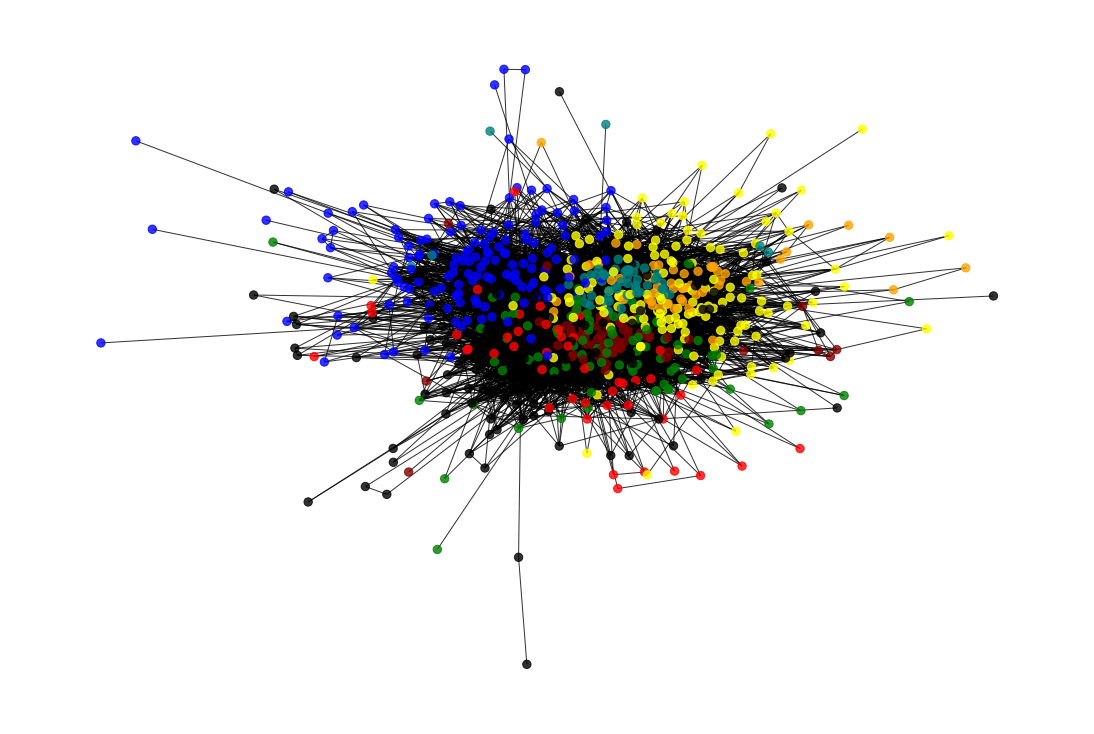

In [71]:
# graph of group 1
comm11 = comm_part(graph_pos1)
size_list11=size_of_comm(comm11)
print(size_list11)
print(int(avg_size_comm(size_list11)))
avg_size_list.append(('graph_pos1',avg_size_comm(size_list11)))
comm_color(graph_pos1,comm11)

[67, 80, 85, 169, 21, 28, 82, 63]
74


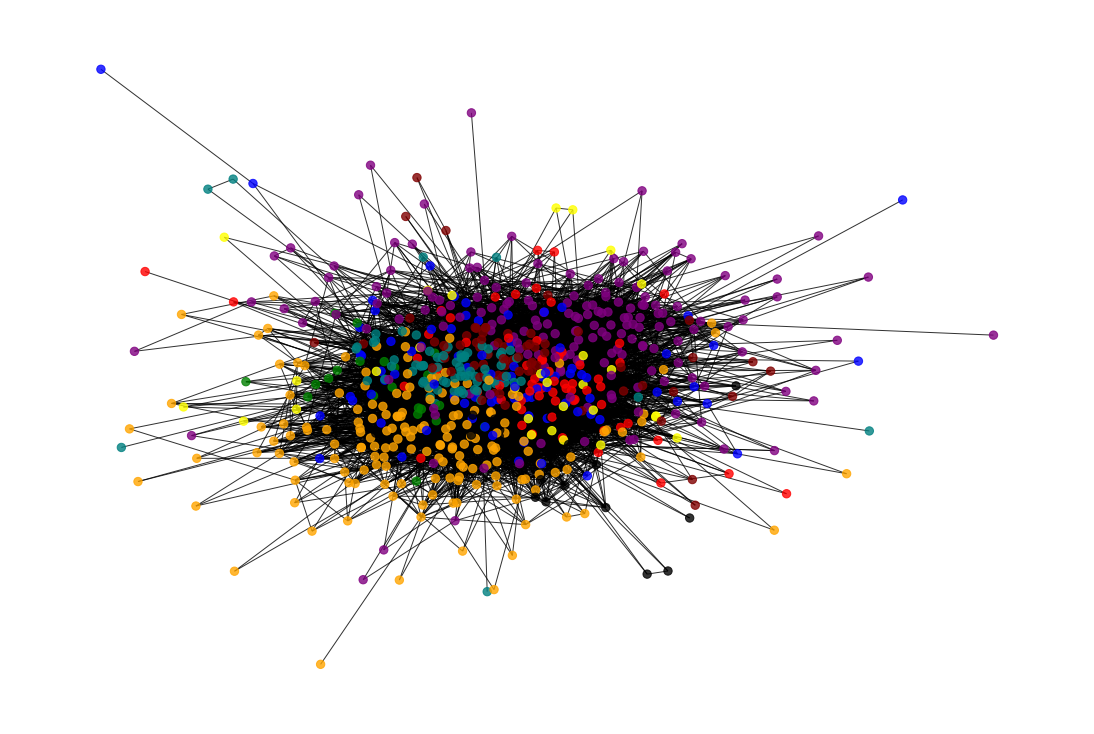

In [72]:
# graph of group 1
comm12 = comm_part(graph_product1)
size_list12=size_of_comm(comm12)
print(size_list12)
print(int(avg_size_comm(size_list12)))
avg_size_list.append(('graph_product1',avg_size_comm(size_list12)))
comm_color(graph_product1,comm12)

[132, 82, 75, 128, 68, 35, 123, 50, 1, 52]
74


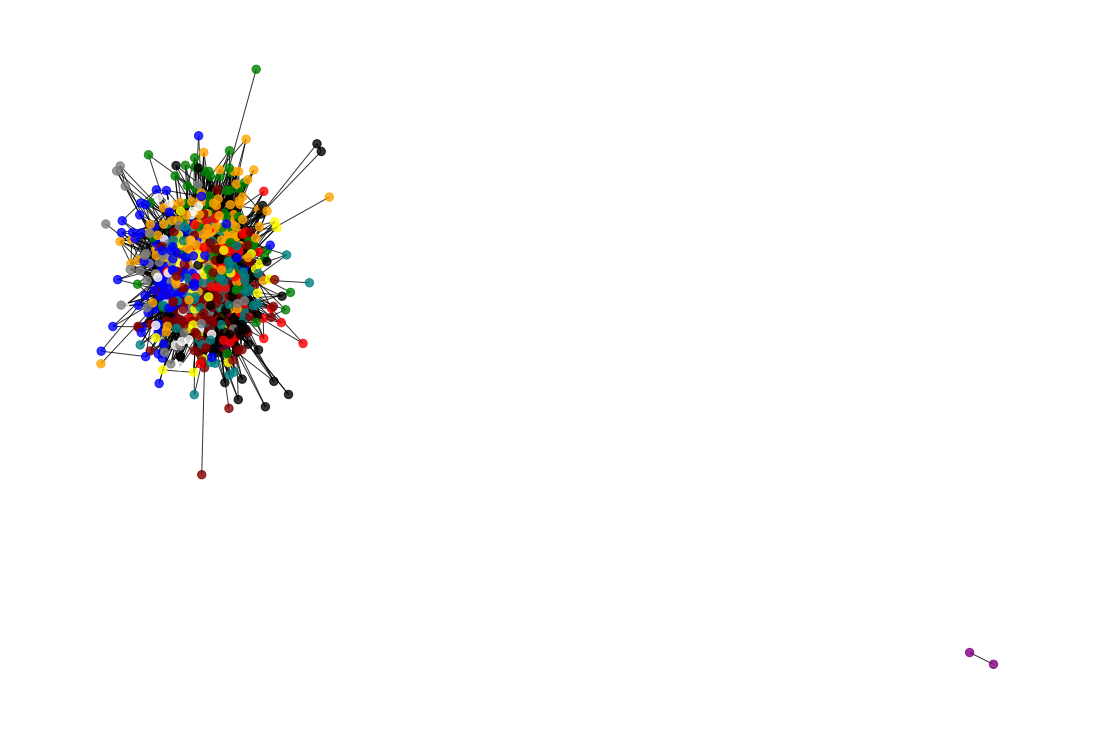

In [73]:
# graph of group 1
comm13 = comm_part(graph_porduct_pop1)
size_list13=size_of_comm(comm13)
print(size_list13)
print(int(avg_size_comm(size_list13)))
avg_size_list.append(('graph_product_pop1',avg_size_comm(size_list13)))
comm_color(graph_porduct_pop1,comm13)

In [74]:
# graph of group 1
comm14 = comm_part(graph_neg1)
size_list14=size_of_comm(comm14)
print(size_list14)
print(int(avg_size_comm(size_list14)))
avg_size_list.append(('graph_neg1',avg_size_comm(size_list14)))

[3, 10, 10, 2, 10, 2, 10, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 2, 10, 10, 10, 10, 10, 10, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 2, 10, 10, 2, 10, 10, 10, 2, 10, 2, 10, 10, 2, 10, 10, 2, 10, 2, 2, 10, 10, 10, 10, 2, 10, 10, 10, 10, 10, 2, 10, 2, 10, 10, 10, 10, 2, 10, 2, 10, 10, 2, 10, 2, 10, 10, 10, 10, 10, 2, 2, 2, 10, 10, 2, 10]
7


[75, 295, 367, 114, 98, 124, 55]
161


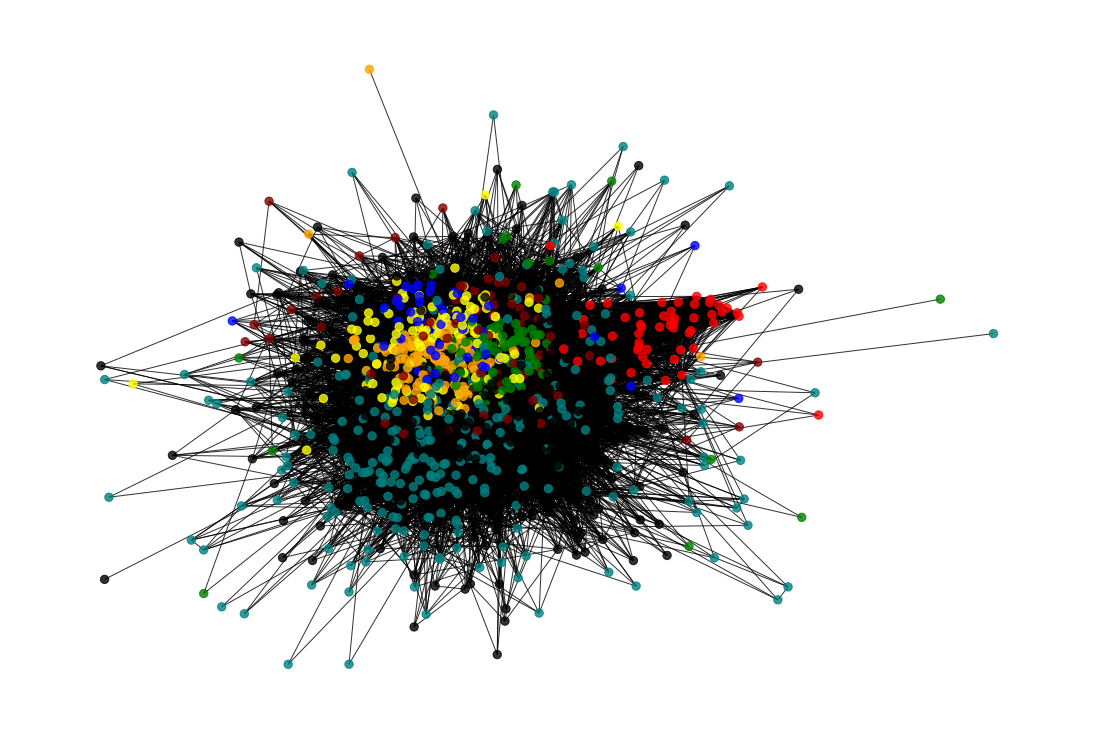

In [75]:
# graph of group 2
comm21 = comm_part(graph_pos2)
size_list21=size_of_comm(comm21)
print(size_list21)
print(int(avg_size_comm(size_list21)))
avg_size_list.append(('graph_pos2',avg_size_comm(size_list21)))
comm_color(graph_pos2,comm21)

[113, 265, 368, 94, 101, 106, 49]
156


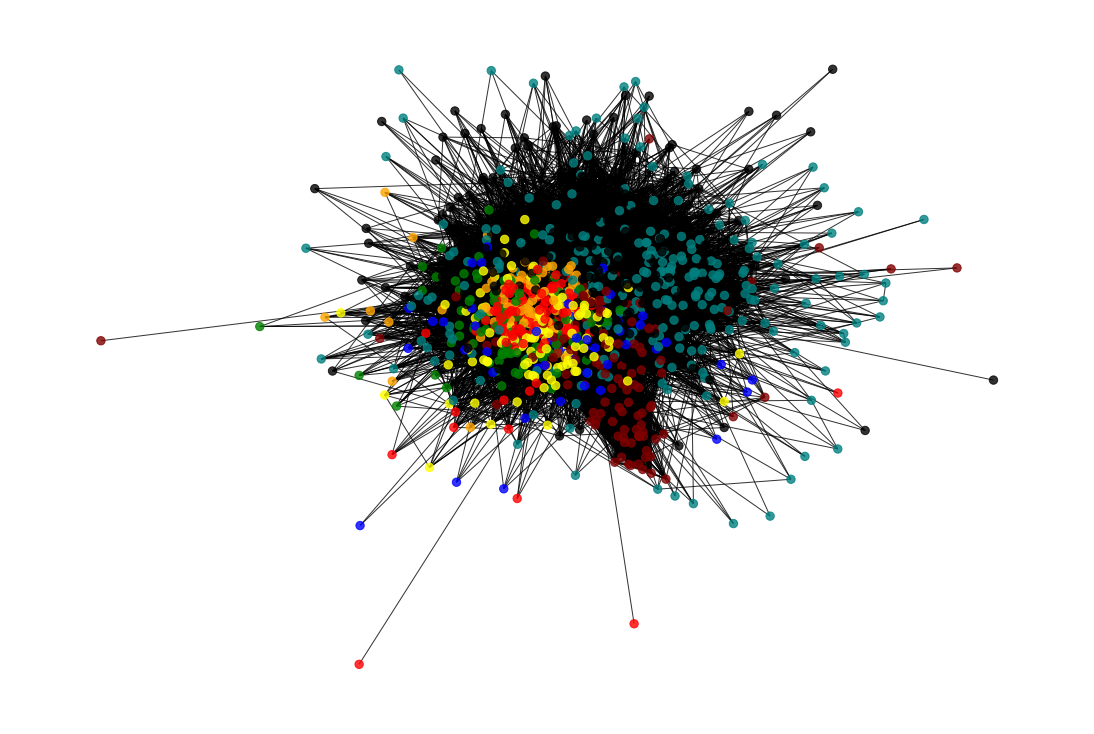

In [76]:
# graph of group 2
comm22 = comm_part(graph_product2)
size_list22=size_of_comm(comm22)
print(size_list22)
print(int(avg_size_comm(size_list22)))
avg_size_list.append(('graph_product2',avg_size_comm(size_list22)))
comm_color(graph_product2,comm22)

[179, 147, 93, 118, 133, 62, 115]
121


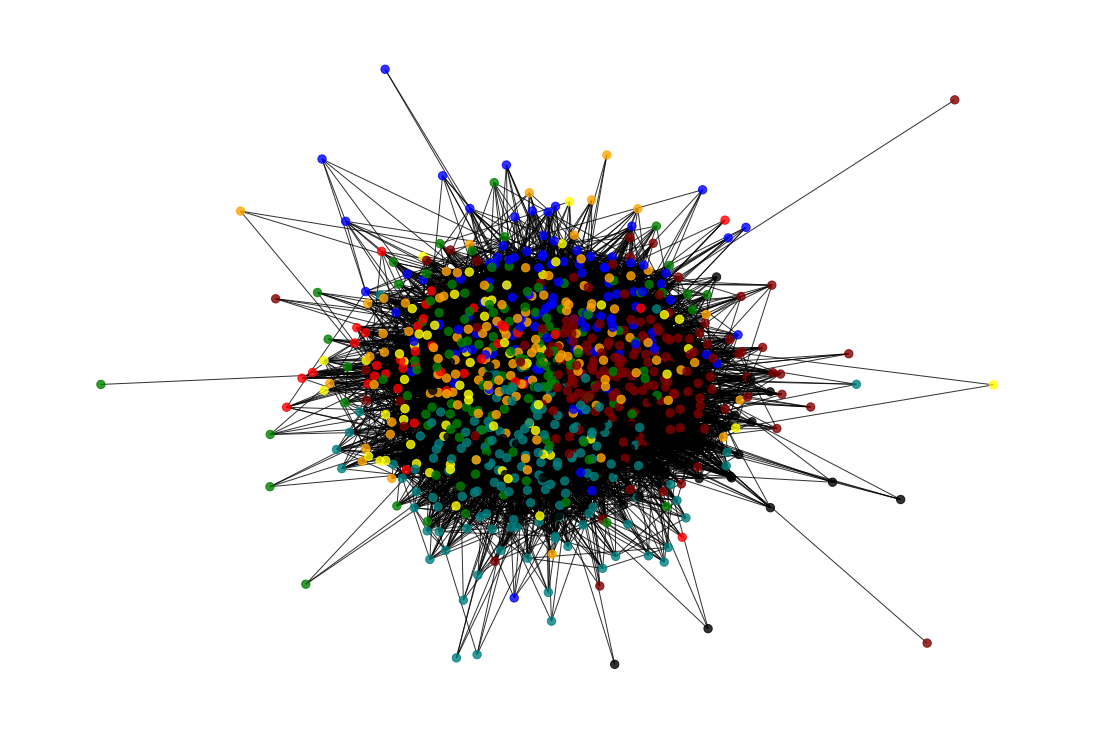

In [77]:
# graph of group 2 
comm23 = comm_part(graph_porduct_pop2)
size_list23=size_of_comm(comm23)
print(size_list23)
print(int(avg_size_comm(size_list23)))
avg_size_list.append(('graph_porduct_pop2',avg_size_comm(size_list23)))
comm_color(graph_porduct_pop2,comm23)

[58, 648, 56, 81, 258]
220


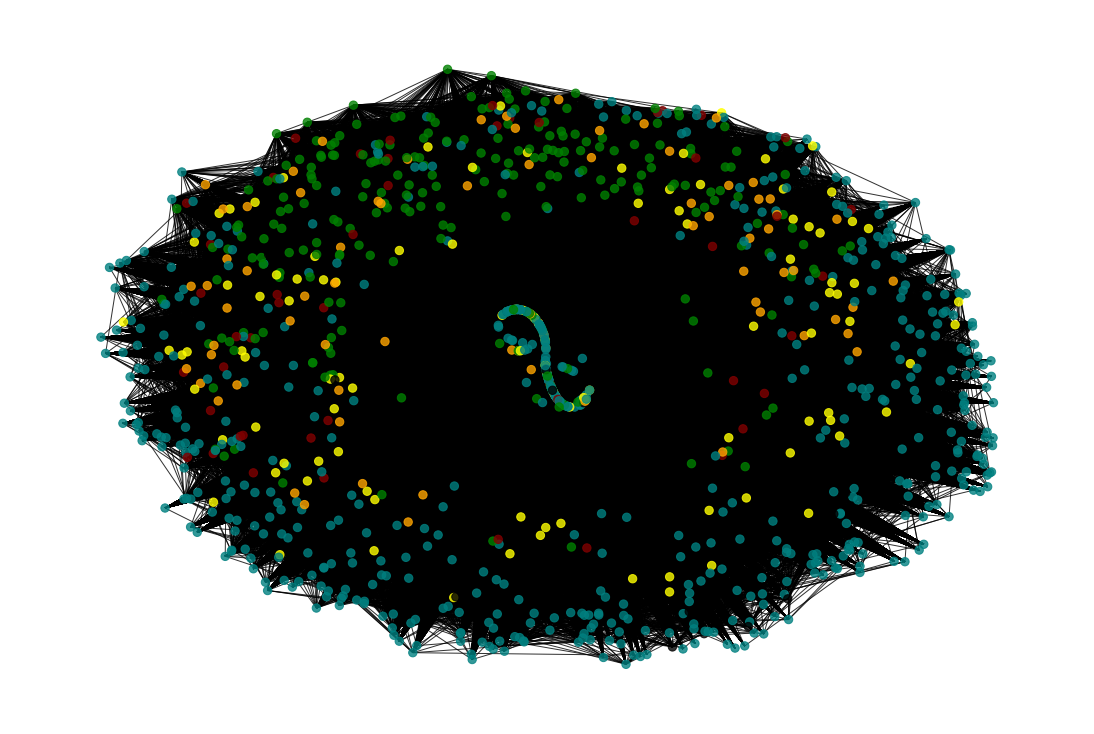

In [78]:
# graph of group 2
comm24 = comm_part(graph_neg2)
size_list24=size_of_comm(comm24)
print(size_list24)
print(int(avg_size_comm(size_list24)))
avg_size_list.append(('graph_neg2',avg_size_comm(size_list24)))
comm_color(graph_neg2,comm24)

In [79]:
avg_size_list

[('graph_pos1', 101),
 ('graph_product1', 74),
 ('graph_product_pop1', 74),
 ('graph_neg1', 7),
 ('graph_pos2', 161),
 ('graph_product2', 156),
 ('graph_porduct_pop2', 121),
 ('graph_neg2', 220)]

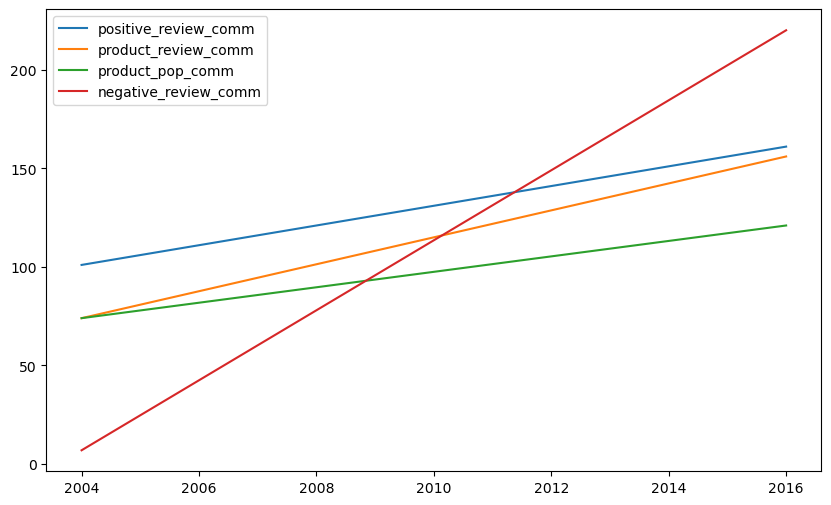

In [1]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
y1 = [101,161]
y2 = [74,156]
y3 = [74,121]
y4 = [7,220]

x = [2004,2016]
plt.figure(figsize=(10,6))
# plot lines
plt.plot(x, y1, label = "positive_review_comm")
plt.plot(x, y2, label = "product_review_comm")
plt.plot(x, y3, label = "product_pop_comm")
plt.plot(x, y4, label = "negative_review_comm")
plt.legend()
plt.show()